In [55]:
from pathlib import Path
import pandas as pd

# Get the current notebook's directory
CURRENT_NOTEBOOK_DIR = Path().resolve()

# Assume project root is one level up from notebooks/
BASE_DIR = CURRENT_NOTEBOOK_DIR.parent.parent

# Define path to the data file
RAW_DATA_PATH2 = BASE_DIR / "Data_Gathering" / "City_Data" / "Gurgaon" / "Outlier_Detection"

# # Load the data
# import pandas as pd
# df = pd.read_csv(RAW_DATA_PATH)

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# pd.set_option('display.max_columns', None)

In [58]:
df_o = pd.read_csv(RAW_DATA_PATH2/'gurgaon_properties_after_outlier.csv')

In [59]:
df_o.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,1,8
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,1,38
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,1,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,2,174
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,...,632.0,NaN,532.0,0,0,1,0,0,1,159


In [60]:
df_o.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1031
agePossession             0
super_built_up_area    1718
built_up_area          1978
carpet_area            1740
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

### Column: Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

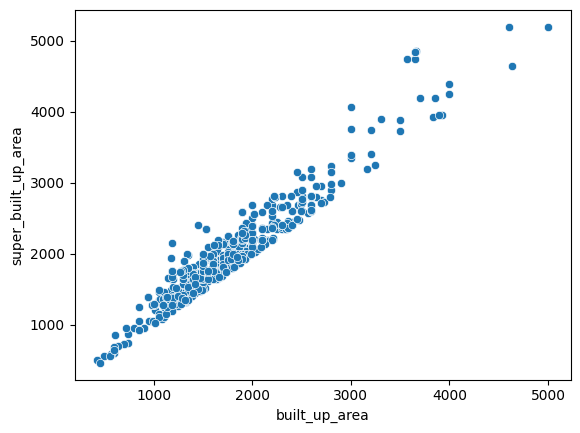

In [61]:
sns.scatterplot(x=df_o['built_up_area'],y=df_o['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

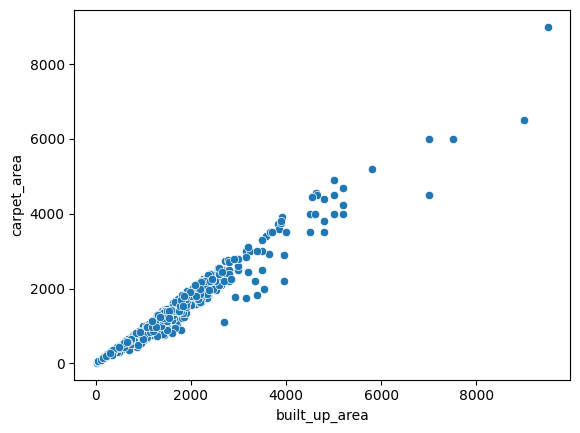

In [62]:
sns.scatterplot(x = df_o['built_up_area'],y=df_o['carpet_area'])

In [63]:
((df_o['super_built_up_area'].isnull()) & (df_o['built_up_area'].isnull()) & (df_o['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3588    False
3589    False
3590    False
3591    False
3592    False
Length: 3593, dtype: bool

In [64]:
all_present_df = df_o[~((df_o['super_built_up_area'].isnull()) | (df_o['built_up_area'].isnull()) | (df_o['carpet_area'].isnull()))]

In [65]:
all_present_df.shape

(531, 23)

In [66]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [67]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [68]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [69]:
# both present built up null
sbc_df = df_o[~(df_o['super_built_up_area'].isnull()) & (df_o['built_up_area'].isnull()) & ~(df_o['carpet_area'].isnull())]

In [70]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,1,8
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,...,632.0,NaN,532.0,0,0,1,0,0,1,159
39,flat,corona optus,sector 37c,1.25,7176.0,1742.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,...,1735.0,NaN,1400.0,1,0,0,0,0,1,49
41,flat,m3m merlin,sector 67,2.80,13679.0,2047.0,Super Built up area 2047(190.17 sq.m.)Carpet a...,3,3,3,...,2047.0,NaN,1880.0,0,1,0,0,0,0,26
46,flat,smart world orchard,sector 61,2.10,13752.0,1527.0,Super Built up area 1549(143.91 sq.m.)Carpet a...,3,2,3,...,1549.0,NaN,1500.0,0,0,0,0,0,1,146


In [71]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4124\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_4124\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc

In [72]:
df_o.update(sbc_df)

In [73]:
df_o.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1031
agePossession             0
super_built_up_area    1718
built_up_area          1557
carpet_area            1740
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [74]:
# sb present c is null built up null
sb_df = df_o[~(df_o['super_built_up_area'].isnull()) & (df_o['built_up_area'].isnull()) & (df_o['carpet_area'].isnull())]

In [75]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
5,flat,paras quartier,gwal pahari,7.50,14019.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,...,5350.0,NaN,NaN,0,1,0,1,1,2,49
6,flat,experion the heartsong,sector 108,2.00,8554.0,2338.0,Super Built up area 2338(217.21 sq.m.),3,3,3+,...,2338.0,NaN,NaN,0,1,0,0,0,1,95
7,flat,adani m2k oyster grande,sector 102,1.90,9104.0,2087.0,Super Built up area 1889(175.49 sq.m.),3,4,3,...,1889.0,NaN,NaN,0,1,0,0,0,1,165
12,flat,ats tourmaline,sector 109,2.25,8704.0,2585.0,Super Built up area 2585(240.15 sq.m.),3,4,3,...,2585.0,NaN,NaN,0,1,0,0,0,1,101
15,flat,bestech park view sanskruti,sector 92,1.55,7568.0,2048.0,Super Built up area 1995(185.34 sq.m.),3,4,3,...,1995.0,NaN,NaN,0,1,0,0,0,2,60


In [76]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4124\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_4124\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df

In [77]:
df_o.update(sb_df)

In [78]:
df_o.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1031
agePossession             0
super_built_up_area    1718
built_up_area           682
carpet_area            1740
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [79]:
# sb null c is present built up null
c_df = df_o[(df_o['super_built_up_area'].isnull()) & (df_o['built_up_area'].isnull()) & ~(df_o['carpet_area'].isnull())]

In [80]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,1,38
11,flat,dlf regency park,sector 28,1.60,14545.0,1100.0,Carpet area: 1100 (102.19 sq.m.),2,2,2,...,NaN,NaN,1100.0,0,0,0,0,0,1,52
13,flat,emaar mgf emerald floors premier,sector 65,2.77,14025.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4,4,3+,...,NaN,NaN,1975.0,1,1,0,0,0,0,174
19,flat,afnhb jalvayu vihar,sector 30,0.85,12859.0,661.0,Carpet area: 661 (61.41 sq.m.),2,2,1,...,NaN,NaN,661.0,0,0,0,0,1,2,49
25,flat,chanderlok society,sector 28,0.90,7235.0,1244.0,Carpet area: 1244 (115.57 sq.m.),4,2,3+,...,NaN,NaN,1244.0,0,0,0,0,0,1,0


In [81]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4124\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_4124\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area'

In [82]:
df_o.update(c_df)

In [83]:
df_o.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1031
agePossession             0
super_built_up_area    1718
built_up_area             0
carpet_area            1740
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

(0.0, 12000.0)

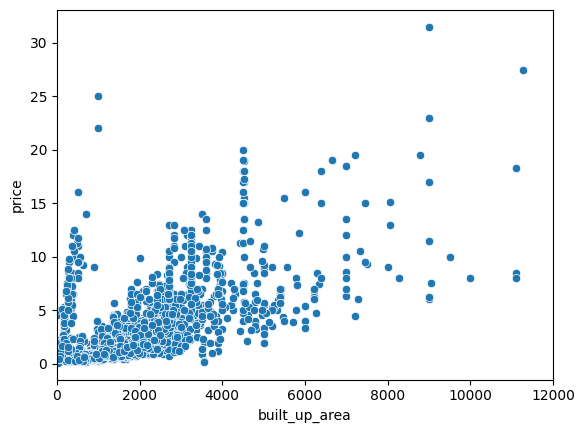

In [84]:
sns.scatterplot(x = df_o['built_up_area'],y = df_o['price'])
plt.xlim(0,12000)

In [85]:
anamoly_df = df_o[(df_o['built_up_area'] < 2000) & (df_o['price'] > 2.5)][['price','area','built_up_area']]

In [86]:
anamoly_df.sample(5)

,price,area,built_up_area
2366,8.70,2250.0,267.0
2807,3.40,2185.0,1977.0
503,4.70,2368.0,170.0
1908,3.55,1449.0,1449.0
1577,5.15,3660.0,340.0


In [87]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [88]:
df_o.update(anamoly_df)

(0.0, 12000.0)

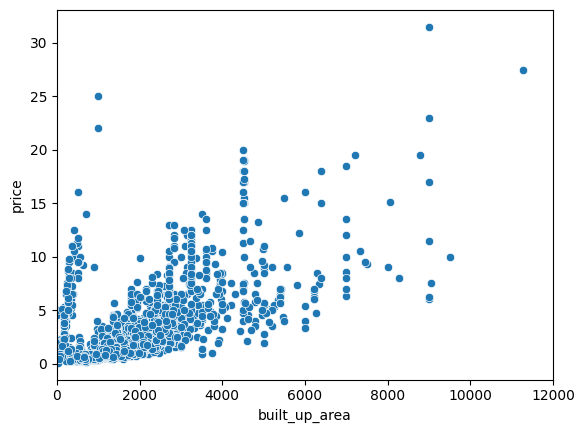

In [89]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])
plt.xlim(0,12000)

In [90]:
df_o.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [91]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,1,8
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,1,38
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,1,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,2,174
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,...,632.0,NaN,532.0,0,0,1,0,0,1,159


In [92]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1031
agePossession             0
super_built_up_area    1718
built_up_area          1103
carpet_area            1740
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

### floorNum

In [93]:
df_o[df_o['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
505,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,1,0
774,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,1,9
1303,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,1,0
1462,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,1,21
1475,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,1,0
1969,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,1,0
2072,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,1,88
2181,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,1,0
2297,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,2,114
2465,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,2,130


In [94]:
df_o[df_o['property_type'] == 'house']['floorNum'].median()

np.float64(2.0)

In [95]:
df_o['floorNum'].fillna(2.0,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4124\3593435765.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_o['floorNum'].fillna(2.0,inplace=True)


In [96]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1031
agePossession             0
super_built_up_area    1718
built_up_area          1103
carpet_area            1740
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [97]:
1011/df_o.shape[0]

0.2813804620094628

### facing

<Axes: ylabel='count'>

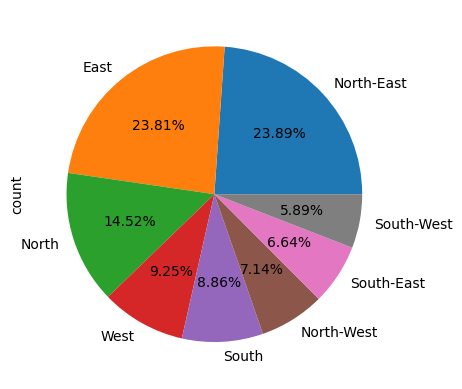

In [98]:
df_o['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [99]:
df_o.drop(columns=['facing'],inplace=True)

In [100]:
df_o.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3489,flat,mvn athens,sohna road,0.25,3671.0,2,2,1,11.0,Relatively New,681.0,0,0,0,0,0,2,67
2829,flat,global hill view,sector 11,0.36,5150.0,2,2,0,15.0,Undefined,699.0,0,0,0,0,0,1,0
1771,house,independent,sector 47,0.99,17188.0,4,4,3,4.0,Relatively New,576.0,0,0,0,0,0,1,13
2673,flat,parkwood westend,sector 92,0.70,5204.0,2,2,3,5.0,Under Construction,1217.0,1,0,0,0,0,1,0
1837,flat,uphaar homes,sector 105,0.45,4737.0,3,2,1,1.0,Relatively New,1056.0,0,0,0,0,0,2,44


In [101]:
df_o.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [103]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1031
agePossession             0
super_built_up_area    1717
built_up_area          1102
carpet_area            1740
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

### agePossession

In [105]:
df_o['agePossession'].value_counts()

agePossession
Relatively New        1612
New Property           565
Moderately Old         551
Undefined              303
Old Property           298
Under Construction     264
Name: count, dtype: int64

In [106]:
df_o[df_o['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,house,independent,sector 109,1.55,6568.0,3,2,0,1.0,Undefined,2360.0,0,0,0,0,0,1,0
33,house,greenopolis,sector 89,0.70,5397.0,2,2,2,14.0,Undefined,1297.0,0,0,0,0,0,1,0
49,flat,smart world gems,sector 89,1.71,12000.0,3,2,0,3.0,Undefined,1423.0,0,0,0,0,0,1,45
71,flat,rof aalayas,sector 102,0.45,6000.0,1,1,2,6.0,Undefined,750.0,0,0,0,0,0,1,0
75,house,bhim garh kheri,sector 3,1.50,7576.0,7,2,0,1.0,Undefined,1980.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539,flat,signature global city,sector 37d,1.10,9839.0,2,2,2,4.0,Undefined,1242.0,0,0,0,0,0,1,59
3545,house,independent,sector 21,0.45,8411.0,3,2,1,1.0,Undefined,594.0,0,0,0,0,0,1,0
3557,flat,sidhartha ncr one,sector 95,0.57,4179.0,2,2,2,10.0,Undefined,1364.0,0,0,0,0,0,1,0
3564,house,independent,sector 28,0.45,10000.0,5,3,0,1.0,Undefined,50.0,0,0,0,0,0,1,0


In [107]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df_o[(df_o['sector'] == row['sector']) & (df_o['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [108]:
df_o['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [109]:
df_o['agePossession'].value_counts()

agePossession
Relatively New        1718
New Property           605
Moderately Old         600
Old Property           333
Under Construction     278
Undefined               58
Name: count, dtype: int64

In [110]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df_o[(df_o['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [111]:
df_o['agePossession'] = df_o.apply(mode_based_imputation2,axis=1)

In [112]:
df_o['agePossession'].value_counts()

agePossession
Relatively New        1730
Moderately Old         607
New Property           606
Old Property           336
Under Construction     278
Undefined               35
Name: count, dtype: int64

In [113]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df_o[(df_o['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [114]:
df_o['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [115]:
df_o['agePossession'].value_counts()

agePossession
Relatively New        1789
Moderately Old         676
New Property           565
Old Property           298
Under Construction     264
Name: count, dtype: int64

In [116]:

df_o.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      1
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [117]:
df.shape

(3592, 23)